In [54]:
res1 = None
res2 = None

$$ Функція мети: \\ F(x) = 18x_1 + 13x_2 \rightarrow \ min \\ Обмеження: \\ \left\{ \begin{array}\\ 12x_1 + 25x_2 & \leqslant \ 300 \\ 24x_1 + 13x_2 & \leqslant \ 850 \\ x_1, x_2 & \geqslant \ 0 \ \end{array} \right. $$

In [55]:
import scipy.optimize as solve
import time

c = [-18, -13]
A = [[12, 25], [24,13]]
b = [300, 850]

start = time.time()
x0_bounds = (0, None)
x1_bounds = (0, None)
res = solve.linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
print(res)
stop = time.time()
print('Time: ', stop - start)

res1 = res.x

     con: array([], dtype=float64)
     fun: -449.9999999955956
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([2.76969558e-09, 2.50000000e+02])
  status: 0
 success: True
       x: array([2.50000000e+01, 1.01986215e-11])
Time:  0.8303139209747314


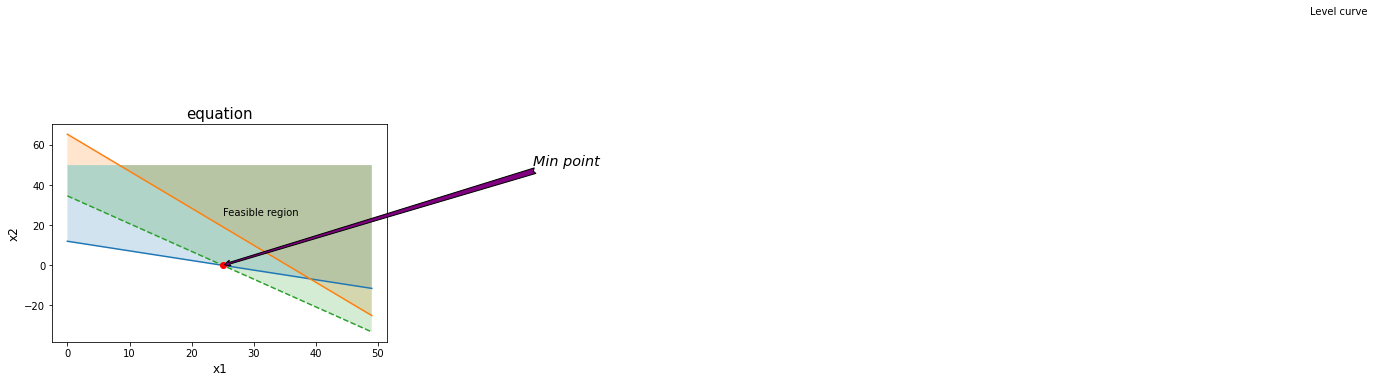

In [56]:
import matplotlib.pyplot as plt
import numpy as np

def f(a1, a2, b, x):
    return (b - a1 * x) / a2

X_MAX = 50
STEP = int(X_MAX / 50)
x = np.arange(0, X_MAX, STEP)
for i in range(len(A)):
    y = f(b=b[i], a1=A[i][0], x=x, a2=A[i][1])
    plt.plot(x, y)
    plt.fill_between(x, y, X_MAX, alpha=0.2)
plt.text(200, 125, 'Level curve')
y = (c[0] * res.x[0] - c[0] * x) / c[1]
plt.plot(x, y, '--')
plt.fill_between(x, y, X_MAX, alpha=0.2)
plt.annotate('Min point', xy=(res.x[0], res.x[1]), xytext=(res.x[0] + 50, res.x[1] + 50), size='x-large',
             style='italic', arrowprops=dict(facecolor='purple', arrowstyle='fancy'))
plt.plot(res.x[0], res.x[1], 'ro')
plt.text(X_MAX/2, X_MAX/2, 'Feasible region')
plt.title('equation', fontsize=15)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12, color='black')
plt.savefig('paint.png', dpi=300)
plt.show()

In [57]:
from pulp import *
start = time.time()
x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)

problem = pulp.LpProblem('0', LpMaximize)
problem += 18 * x1 + 13 * x2, 'F(x)'
problem += 12 * x1 + 25 * x2 <= 300, 'condition 1'
problem += 24 * x1 + 13 * x2 <= 850, 'condition 2'
problem.solve()

res = list()
print('Results: ')
for v in problem.variables():
    print(v.name, '=', v.varValue)
    res.append(v.varValue)
print('Income: ', value(problem.objective))
stop = time.time()
print('Time: ', stop - start)

res2 = res

Results: 
x1 = 25.0
x2 = 0.0
Income:  450.0
Time:  1.6634364128112793


In [15]:
print('Solution results: ')
print('scipy.optimize result: ', res1)
print('pulp result: ', res2)
print('np.allclose: ', np.allclose(np.array(res1), np.array(res2)))
print('np.allclose [0]: ', np.allclose(np.array(res1[0]), np.array(res2[0])))
print('np.allclose [1]:', np.allclose(np.array(res1[1]), np.array(res2[1])))

Solution results: 
scipy.optimize result:  [7.73435497e-14 1.06891263e-13]
pulp result:  [33.333333, 0.0]
np.allclose:  False
np.allclose [0]:  False
np.allclose [1]: True


$$ Функція мети: \\ F(x) = 10x_{11} + 8x_{12} + 7x_{13} + 12x_{14} + 9x_{15} + 4x_{21} + 6x_{22} + 5x_{23} + 3x_{24} + 14x_{25} + 15x_{31} + 10x_{32} + 6x_{33} + 5x_{34} + 7x_{35} + 11x_{41} + 3x_{42} + 6x_{43} + 4x_{44} + 5x_{45} \rightarrow \ min \\ Обмеження: \\ \left\{ \begin{array}\\ 10x_{11} + 8x_{12} + 7x_{13} + 12x_{14} + 9x_{15} = 85 \\ 4x_{21} + 6x_{22} + 5x_{23} + 3x_{24} + 14x_{25} = 110 \\ 15x_{31} + 10x_{32} + 6x_{33} + 5x_{34} + 7x_{35} = 65 \\ 11x_{41} + 3x_{42} + 6x_{43} + 4x_{44} + 5x_{45} = 80 \\ 10x_{11} + 4x_{21} + 15x_{31} + 11x_{41} = 90 \\ 8x_{12} + 6x_{22} + 10x_{32} + 3x_{42} = 70 \\ 7x_{13} + 5x_{23} + 6x_{33} + 6x_{43} = 70 \\ 12x_{14} + 3x_{24} + 5x_{34} + 4x_{44} = 60 \\ 9x_{15} + 14x_{25} + 7x_{35} + 5x_{45} = 50 \\ x_{ij} \geqslant 0, \\ i,j \geqslant 0 \ \end{array} \right. $$

In [82]:
import numpy as np
from scipy.optimize import linprog
import time
import pandas
start = time.time()
c = [10, 8, 7, 12, 9, 4, 6, 5, 3, 14, 15, 10, 6, 5, 7, 11, 6, 3 , 4, 5]
aa = np.zeros(180, dtype=int)
a = aa.reshape(9, 20) 
a[0, 0:5] = 1 
a[1, 5:10] = 1 
a[2, 10:15] = 1
a[3, 15:20] = 1
a[4, 0::5] = 1
a[5, 1::5] = 1
a[6, 2::5] = 1
a[7, 3::5] = 1
a[8, 4::5] = 1
print(a)
A = a
b = [85, 110, 65, 80, 90, 70, 70, 60, 50]
bnd = [(0, int(1000))] * 20
res = linprog(c, A_eq=A, b_eq=b, bounds=bnd)
d = {'con': res.con, 'fun': res.fun, 'message': res.message, 'nit': res.nit, 'success': res.success}
df = pandas.DataFrame(data=d)
print(df)
stop = time.time()
print('Time: ', stop - start)


[[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]]
            con     fun                                message  nit  success
0  1.203095e-08  1750.0  Optimization terminated successfully.    7     True
1  1.579028e-08  1750.0  Optimization terminated successfully.    7     True
2  9.023111e-09  1750.0  Optimization terminated successfully.    7     True
3  1.127823e-08  1750.0  Optimization terminated successfully.    7     True
4  1.293299e-08  1750.0  Optimization terminated successfully.    7     True
5  9.925259e-09  1750.0  Optimization terminated successfully.    7     True
6  9.925273e-09  1750.0  Optimization terminated successfully.    7     T